# Google Play Store Apps and Reviews

Given the ubiquity of apps in this day and age, I want to do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories and looking for insights in the data to devise strategies to drive growth and retention.

Dataset: https://www.kaggle.com/datasets/lava18/google-play-store-apps?resource=download

1. Data Exploration

In [ ]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Have a look at a random sample of 5 rows
print(apps.sample(5))

# This is a comment I am writing to show a git commit

Total number of apps in the dataset =  10358
                                                 App            Category  \
5938       Fitness Dance for Zum.ba Workout Exercise  HEALTH_AND_FITNESS   
4574  S Photo Editor - Collage Maker , Photo Collage         PHOTOGRAPHY   
9835                     Blagues et Histoires Drôles              FAMILY   
6718                                      Bullshite!                GAME   
656        Titanic App - Feminist Dating Application              DATING   

      Rating Reviews  Size      Installs  Type Price Content Rating  \
5938     4.2     287   12M       50,000+  Free     0       Everyone   
4574     4.4  972574   45M  100,000,000+  Free     0       Everyone   
9835     3.9     859  5.3M      100,000+  Free     0           Teen   
6718     2.8      48   13M       10,000+  Free     0           Teen   
656      4.5     120   10M          500+  Free     0     Mature 17+   

                Genres       Last Updated Current Ver Android Ver  
593

2. Data Cleaning

It looks like some entries in the columns like Installs and Price have special characters due to the way the numbers have been represented. Since we need these columns to be pureley numeric in order to do calculations, I'm going to clean the data to make it easier to use.


In [4]:
# List of characters to remove
chars_to_remove = ["+",",","$"]
# List of column names to clean
cols_to_clean = ["Installs","Price"]

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# Print a summary of the apps dataframe
print(apps.info)

<bound method DataFrame.info of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE

/var/folders/8v/c61zkvrs0f933p0hmnj5hv040000gn/T/ipykernel_44887/3402178148.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps[col] = apps[col].apply(lambda x: x.replace(char, ''))


3. Exploring app categories

I want to answer the following questions with my visualization:

- Which category has the highest share of (active) apps in the market?

- Is any specific category dominating the market?

- Which categories have the fewest number of apps?

In [3]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

ModuleNotFoundError: No module named 'plotly'

There are 34 unique app categories in this dataset. Family and Game apps have the highest market prevalence. Tools, Business and Medical apps are also at the top, while Beauty and Comics apps are at the bottom.

4. Distribution of app ratings

Since ratings are a key performance indicator of an app, I want to use them to let's see how all these apps perform on an average. 

In [ ]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.189542336669298


The average volume of ratings across all app categories is 4.18. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

5. Size and price of an app

I want to examime how the size and a price of an app affect its performance:

Does the size of an app affect its rating?

Do users really care about system-heavy apps or do they prefer light-weighted apps?

Does the price of an app affect its rating?

Do users always prefer free apps over paid apps?

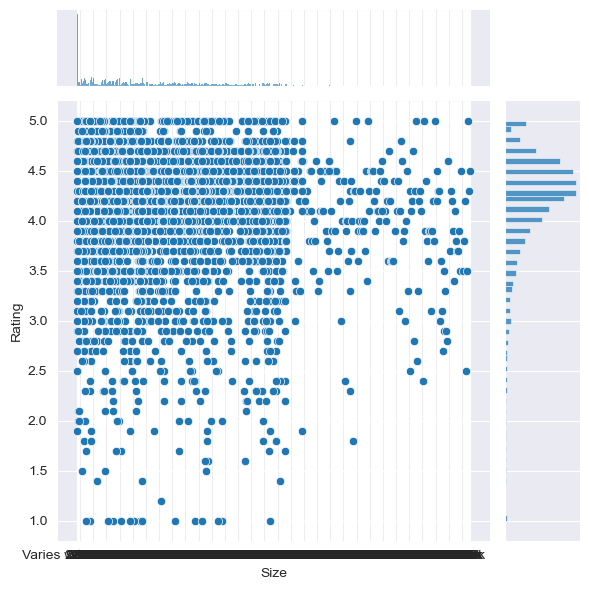

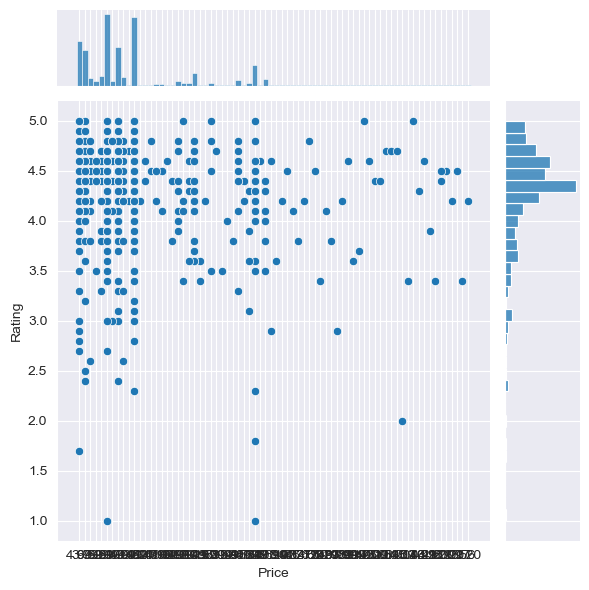

In [ ]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

The majority of top rated apps (rating over 4) range from 2 MB to 20 MB, and the vast majority of apps price themselves under $10.

7. Relation between app category and app price

Pricing can greatly affect how well an app performs on the marketplace, since different categories demand different price ranges. Daily-use apps that are simple and used daily, like the calculator app, should probably be kept free. However, it makes sense to charge for a highly-specialized medical app.

Text(0.5, 1.0, 'App pricing trend across categories')

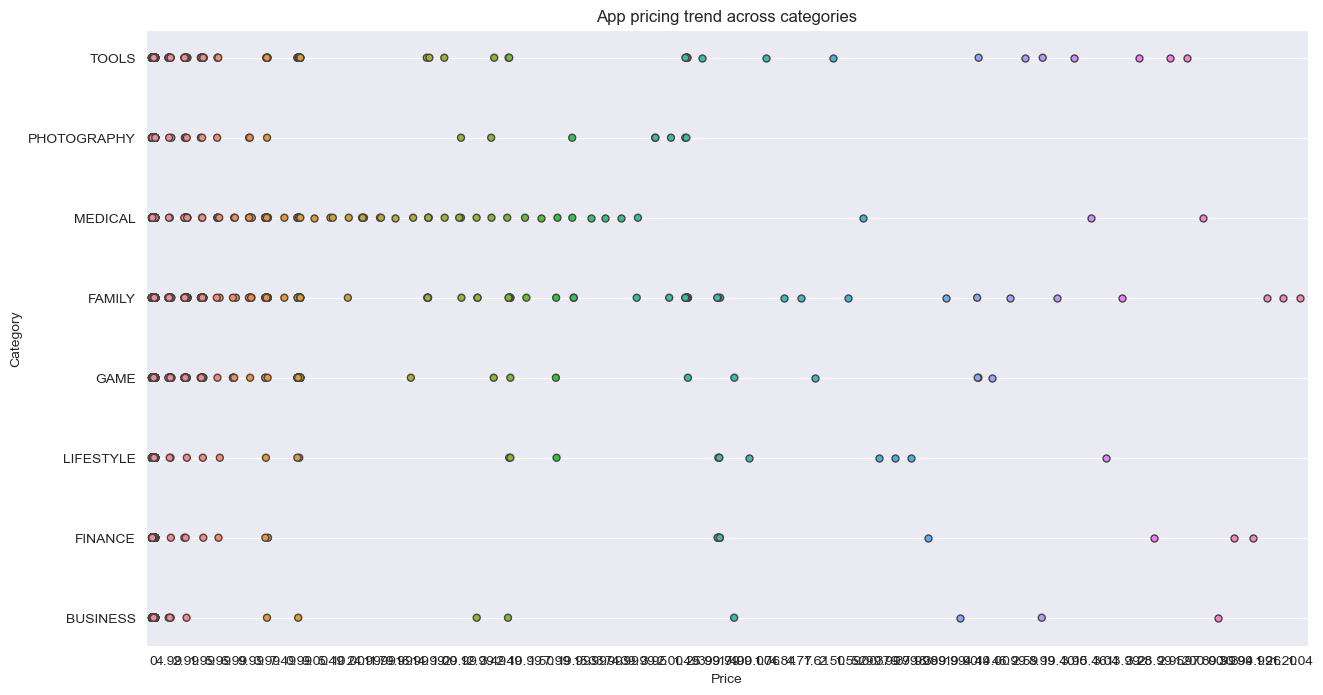

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
# apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
# apps_above_200[['Category', 'App', 'Price']]

We see that Medical and Family apps are the most expensive, while all game apps are reasonably priced below $20.

8. Popularity of paid apps vs free apps


In [ ]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as much as I would have expected!

9. Sentiment analysis of user reviews

 User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

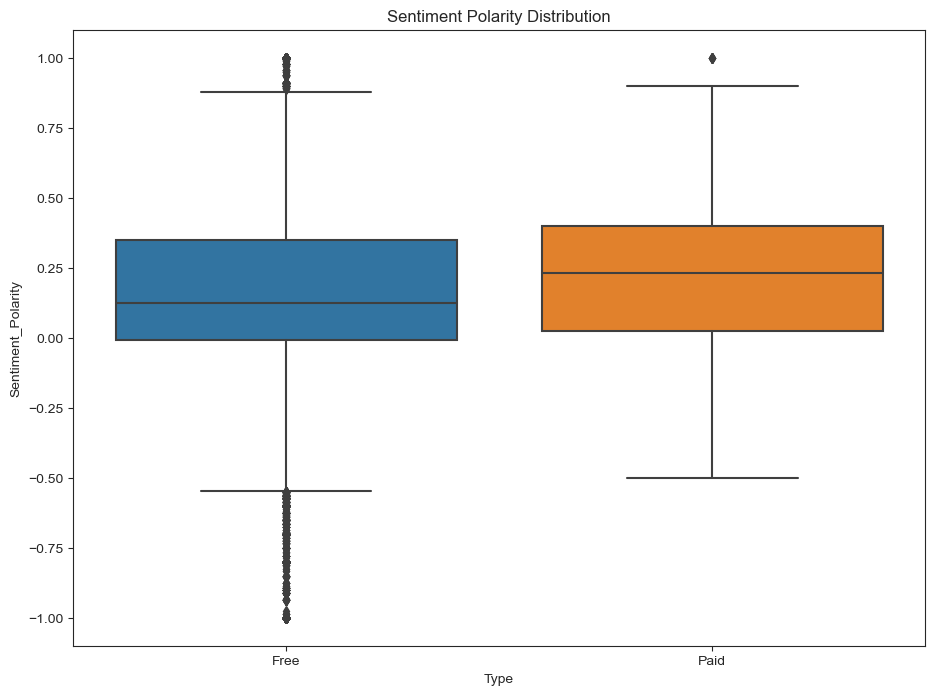

In [ ]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join the two dataframes
merged_df = pd.merge(apps, reviews_df, on = "App")

# # Drop NA values from Sentiment and Review columns
# merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

By plotting sentiment polarity scores of user reviews for paid and free apps, I observed that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. 

Reviews for paid apps appear never to be extremely negative. This can indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. 

The median polarity score for paid apps is a little higher than free apps.